<a href="https://colab.research.google.com/github/KhaldounN/Files-/blob/master/Session_6_Classical_Data_Analysis_DT_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 6: Decision Trees EXERCISES


### Filipa Peleja <filipa.peleja@bts.tech>
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech>

## Classical Data Analysis (05-03-2021)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_10/Session_10_Classical_Data_Analysis_EXERCISES.ipynb)

## EXERCISE 1 - Naive Bayes

We will use a file called 'person_data.txt'. It contains 100 random person data, male and female, with body sizes, weights and gender tags.

**Q1. Designing a Feature class**

The Feature class needs a label, e.g. "heights" or "firstnames". If the feature values are numerical we may want to "bin" them to reduce the number of possible feature values. The heights from our persons have a huge range and we have only 50 measured values for our Naive Bayes classes "male" and "female". We will bin them into ranges "130 to 134", "135 to 139", "140 to 144" and so on by setting bin_width to 5. There is no way of binning the first names, so bin_width will be set to None.

The method frequency returns the number of occurrencies for a certain feature value or a binned range.

In [57]:
#import data & split into columns 

import pandas as pd 
text = "/content/person_data.txt"
file = open(text, "r" , encoding='utf-8' )
df = pd.DataFrame(file)
df = pd.DataFrame(df[0].str.split(' ',4).tolist(),columns=['First_name','last_name','heights' , 'weights' , 'gender'])
df.head()

df['heights'] = df['heights'].astype(int)
df['weights'] = df['weights'].astype(float).astype(int)


In [58]:
#spliting wieghts into bins
df['processed_weights'] = pd.qcut( df['weights'] ,[0 , .25,.5,.75 ,1])

In [59]:
#spliting heights 
cut_bins = list(range(131,213,5))

df['processed_heights'] = pd.cut(df['heights'], bins=cut_bins)

In [60]:
df = df.replace(to_replace='male\n', value  = 'male')
df = df.replace(to_replace='female\n', value  = 'female')
df

,First_name,last_name,heights,weights,gender,processed_weights,processed_heights
0,Randy,Carter,184,73,male,"(61.0, 75.0]","(181, 186]"
1,Stephanie,Smith,149,52,female,"(17.999, 52.0]","(146, 151]"
2,Cynthia,Watson,174,63,female,"(61.0, 75.0]","(171, 176]"
3,Jessie,Morgan,175,67,male,"(61.0, 75.0]","(171, 176]"
4,Katherine,Carter,183,81,female,"(75.0, 122.0]","(181, 186]"
...,...,...,...,...,...,...,...
95,Jessie,Thomas,168,69,female,"(61.0, 75.0]","(166, 171]"
96,Emily,Gonzalez,156,51,female,"(17.999, 52.0]","(151, 156]"
97,Doris,Nelson,167,40,female,"(17.999, 52.0]","(166, 171]"
98,Louis,Bennett,161,18,male,"(17.999, 52.0]","(156, 161]"


In [61]:
df2 = df[['First_name' , 'last_name' , 'gender' , 'processed_weights', 'processed_heights']]
df2.head()

,First_name,last_name,gender,processed_weights,processed_heights
0,Randy,Carter,male,"(61.0, 75.0]","(181, 186]"
1,Stephanie,Smith,female,"(17.999, 52.0]","(146, 151]"
2,Cynthia,Watson,female,"(61.0, 75.0]","(171, 176]"
3,Jessie,Morgan,male,"(61.0, 75.0]","(171, 176]"
4,Katherine,Carter,female,"(75.0, 122.0]","(181, 186]"


**Q2. Design the features**

We will create now two feature classes Feature for the height values of the person data set. One Feature class contains the height for the Naive Bayes class "male" and one the heights for the class "female"

**Q3. Plot  the distribution of Male vs Female**

Based on what you observe and your dataset, which Naive Bayes model that you've learned today is the best for this problem?

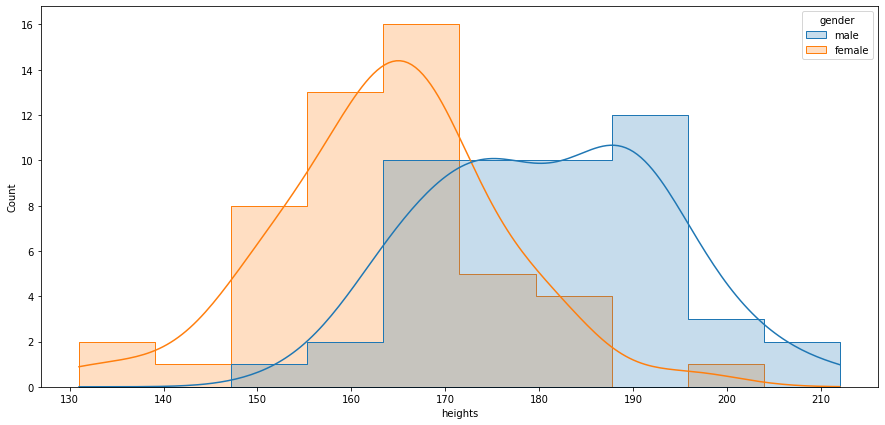

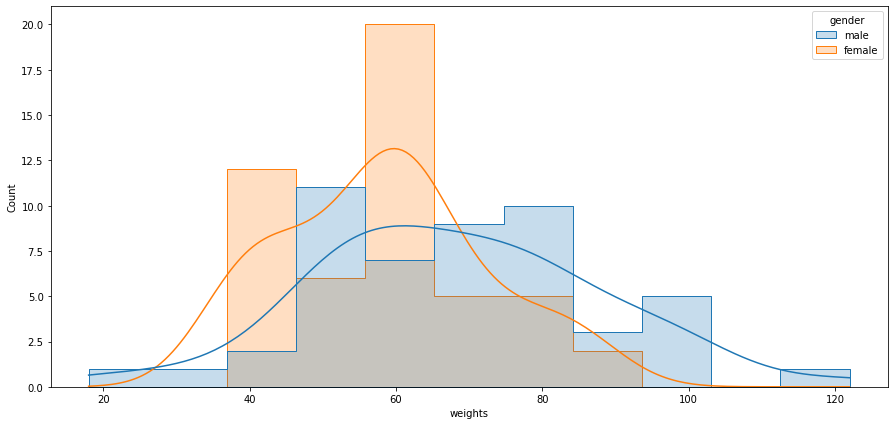

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize = (15,7))
sns.histplot(data = df , x='heights', kde = True  , hue='gender' , element="step")
plt.show()
plt.figure(figsize = (15,7))
sns.histplot(data = df , x='weights', kde = True  , hue='gender' , element="step")
plt.show()


**Q4. Build your Naive Bayes classifier**
- with and without parameter tunning

In [92]:
from sklearn.naive_bayes import GaussianNB

# fitting a model using the continious features
y = df.gender
X = df[['heights' , 'weights']]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [97]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

## Place your reflections here about what you've learned
* When should I used Naive Bayes?
* Why is Naive Bayes powerful for some problems?
* Why is Naive Bayes known for resolving NLP problems?